In [111]:
import pandas as pd

In [112]:
from sklearn.cluster import KMeans


In [113]:
from sklearn.decomposition import PCA


In [114]:
from sklearn.preprocessing import scale


In [115]:
df = pd.read_csv('aggregated_train_NumMosquito_no_strings.csv')

In [134]:
df.Month.min(),df.Month.max()

(5, 10)

In [116]:
string_features = ['Date','Address','Street','AddressNumberAndStreet','CodeSum']

df = df.drop(string_features,axis=1)
labels = df.WnvPresent

In [117]:
data = scale(df)

In [118]:
n_samples, n_features = data.shape

In [119]:
n_targets = 5

In [120]:
reduced_data = PCA(n_components = 2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_targets, n_init=10)
kmeans.fit(reduced_data)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [121]:
sample_size = 300

In [122]:
import numpy as np
h=.02

In [123]:
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [124]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

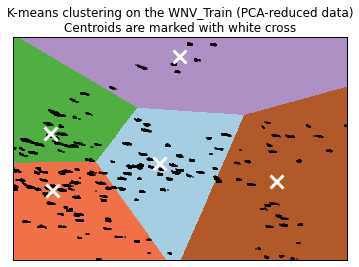

In [126]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the WNV_Train (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('PCA_Reduced_train.png')

plt.show()


In [127]:
from time import time
from sklearn import metrics


In [128]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_targets, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_targets, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_targets, n_init=10),
              name="random", data=data)


n_digits: 5, 	 n_samples 10506, 	 n_features 80
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   1.20s    456070   0.069   0.010   0.017   -0.007   0.009    0.187
   random   0.99s    457752   0.078   0.011   0.019   -0.007   0.011    0.195
